# Step 9: Dimensionality Reduction (Pan-Cancer)

In this notebook, we apply PCA, t-SNE, and UMAP to the Pan-Cancer dataset using deviance-selected genes and log-normalized counts. This dimensionality reduction allows for visualization and downstream clustering.


## 9.1 Load Annotated Dataset and Prepare for PCA


In [1]:
import scanpy as sc
import numpy as np

# Load the dataset after feature selection
adata = sc.read("../../data/pancancer_feature_selection.h5ad")

# Use shifted log-normalized data as input for PCA/tSNE/UMAP
adata.X = adata.layers["log1p_norm"]


## 9.2 Principal Component Analysis (PCA)

We set the `highly_variable` field based on `highly_deviant`, and run PCA on the top deviant genes.


/home/guests3/gba/.conda/envs/tese-env/lib/python3.10/site-packages/scanpy/preprocessing/_pca/__init__.py:439: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


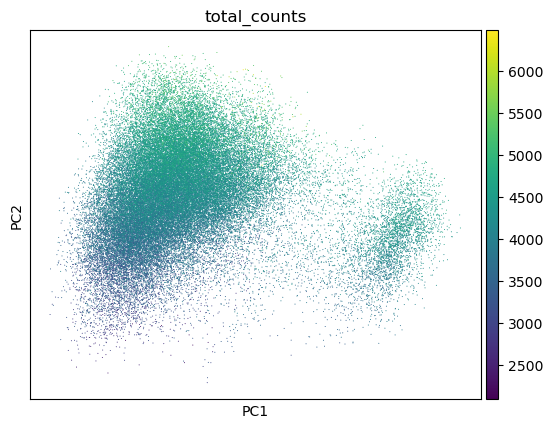

In [2]:
# Mark deviant genes as highly variable
adata.var["highly_variable"] = adata.var["highly_deviant"]

# Run PCA using highly deviant genes
sc.pp.pca(adata, svd_solver="arpack", use_highly_variable=True)

# Save total counts in obs for visualization
adata.obs["total_counts"] = np.ravel(adata.X.sum(axis=1))

# PCA plot
sc.pl.pca_scatter(adata, color="total_counts")


## 9.3 t-SNE Visualization


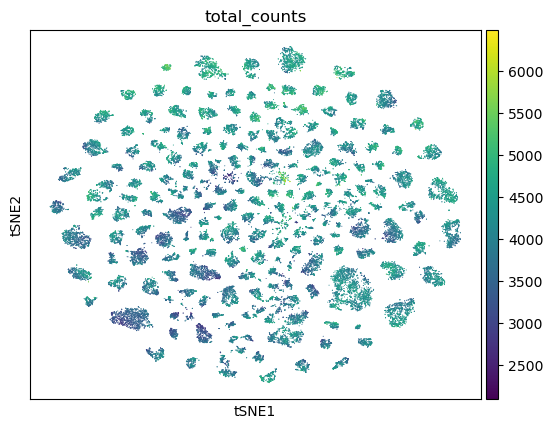

In [3]:
sc.tl.tsne(adata, use_rep="X_pca")
sc.pl.tsne(adata, color="total_counts")


## 9.4 UMAP Embedding

We compute the neighborhood graph and run UMAP.


/home/guests3/gba/.conda/envs/tese-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


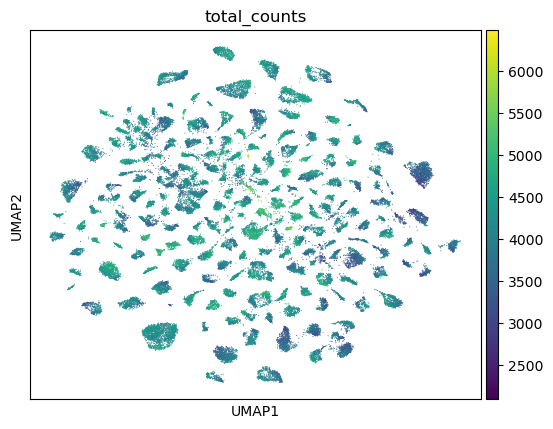

In [4]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color="total_counts")


## 9.5 Inspect Quality Control Metrics (Optional)


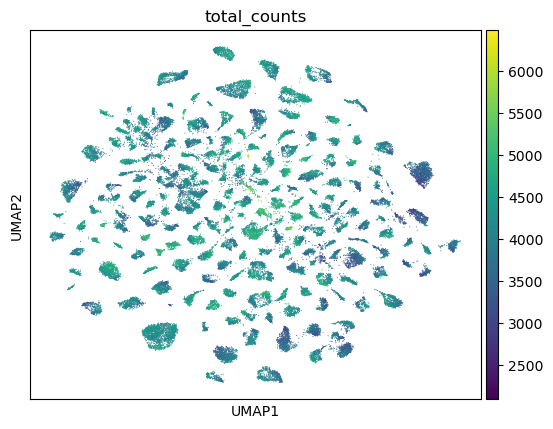

In [5]:
qc_metrics = ["total_counts"]
if "pct_counts_mt" in adata.obs.columns:
    qc_metrics.append("pct_counts_mt")
if "scDblFinder_score" in adata.obs.columns:
    qc_metrics.append("scDblFinder_score")
if "scDblFinder_class" in adata.obs.columns:
    qc_metrics.append("scDblFinder_class")

sc.pl.umap(adata, color=qc_metrics)


## 9.6 Save Reduced Dataset


In [7]:
adata.write("../../data/pancancer_dimred.h5ad")
print("✅ Saved to 'pancancer_dimred.h5ad'")


✅ Saved to 'pancancer_dimred.h5ad'
